<a href="https://www.kaggle.com/code/ensakts/finalproject?scriptVersionId=184547014" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tourists-by-nationalities-in-turkey/Tourists by Nationalities.xlsx


*Turist verilerini görselleştirmek için bir rapor oluştururken aşağıdaki unsurları dikkate alınacak:*
* **Zaman Serileri Gösterimi**: Türkiye'ye yıllar içinde ay ay gelen turist sayısını gösteren bir zaman serisi grafiği. Bu grafik, yıllara göre turist sayısındaki değişimi net bir şekilde gösterir.
* **Ülkelere Göre Turist Dağılımı**: Hangi ülkelerden turistlerin geldiğini gösteren bir pasta grafiği veya harita. Bu görsel, hangi ülkelerden ne kadar turist geldiğini kolayca anlamanızı sağlar.
* **Aylara Göre Turist Dağılımı**: Her ay hangi ülkelerden turistlerin geldiğini gösteren bir çubuk grafik. Bu grafik, hangi aylarda hangi ülkelerden turistlerin yoğun olduğunu gösterir.
* **Toplam Turist Sayısı**: Toplam turist sayısını gösteren bir sayısal değer veya grafik. Bu, genel bir bakış sağlar ve toplam turist sayısındaki trendleri gösterir.
* **En Popüler Ülkeler**: En çok turist gönderen ülkelerin listesi veya grafik. Bu, hangi ülkelerin Türkiye'ye turist göndermede öne çıktığını gösterir.
* **Yıllara Göre Turist Trendleri**: Yıllara göre turist sayısındaki trendleri gösteren bir çizgi grafiği. Bu grafik, yıllar arasındaki değişimleri ve büyüme trendlerini görsel olarak gösterir.

# Adım 1 :Veriyi Tanıma ve İşleme 

### Veriyi kaggle üzerinden çekip pythondan bu excel dosyasını tanımasını sağlıyoruz. Bu excel dosyası içerisinde hangi bilgileri hangi tipte barındırdığını .info() komutu ile çekip görelim.

In [2]:
file_path = '/kaggle/input/tourists-by-nationalities-in-turkey/Tourists by Nationalities.xlsx'
df_tourist = pd.read_excel(file_path)
df_tourist.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 93 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DATE                              151 non-null    object 
 1   GERMANY                           151 non-null    int64  
 2   ALBANIA                           151 non-null    int64  
 3   AUSTRIA                           151 non-null    int64  
 4   BELGIUM                           151 non-null    int64  
 5   BOSNIA AND HERZEGOVINA            151 non-null    int64  
 6   BULGARIA                          151 non-null    int64  
 7   CZECH REPUCLIC                    151 non-null    int64  
 8   DENMARK                           151 non-null    int64  
 9   ESTONIA                           151 non-null    int64  
 10  FINLAND                           151 non-null    int64  
 11   FRANCE                           151 non-null    int64  
 12  SOUTH CY

### Veri üzerinde işlem yapabilmemiz için veriyi DataFrame haline getireceğiz.

In [3]:
df = pd.DataFrame(df_tourist) #veriyi df adında bir dataframe haline getirdik.
df

,DATE,GERMANY,ALBANIA,AUSTRIA,BELGIUM,BOSNIA AND HERZEGOVINA,BULGARIA,CZECH REPUCLIC,DENMARK,ESTONIA,...,PAKISTAN,SINGAPORE,SYRIA,SAUDI ARABIA,THAILAND,JORDAN,YEMEN,AUSTRALIA,NEW ZEALAND,HAYMATLOS
0,2008-04,242531,3219,22668,30772,3539,110627,4198,10878,1098,...,1746,1302,27704.0,2074,1081,3455,331,10084,2249,70
1,2008-05,399724,4156,32265,50483,4709,148642,9286,26008,4508,...,2659,1693,30869.0,2025,1005,4336,444,13011,2606,11
2,2008-06,364145,4862,44762,54415,6093,142896,22824,29591,4649,...,3196,2200,32572.0,2758,779,7329,426,13024,2687,11
3,2008-07,519849,9718,69174,102714,8854,149194,30617,62271,5602,...,3279,1167,43426.0,9587,773,15335,635,15074,3337,17
4,2008-08,728774,12534,145205,130769,9554,151924,29955,54233,4944,...,4026,846,52328.0,24972,954,16285,1005,17875,2842,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2020-06,16837,950,1961,1994,1181,20109,218,531,30,...,375,25,710.0,89,7,924,25,218,36,2
147,2020-07,94960,3680,6757,9343,5335,42525,647,3588,116,...,1170,72,2697.0,69,205,1215,211,291,73,3
148,2020-08,228601,6177,26856,39456,10774,72845,1375,5365,352,...,2821,82,5584.0,350,168,2943,606,621,239,14
149,2020-09,166164,5368,14655,12872,10472,232094,1582,3837,416,...,5718,114,6845.0,688,271,6367,719,1011,406,14


# ADIM 2: VERİ ÜZERİNDE İŞLEM YAPMA VE GRAFİK KULLANARAK SONUÇLARA VARMA

## Öncelikle bütün ülkelerin ortalamasını alacağız ve sonrasında veri setimizdeki en büyük ve en küçük ortalamalara sahip ülkelere bakacağız.


In [4]:
column_means = df.drop('DATE', axis=1).mean() # veri setindeki sütundaki ülkelerin hepsinin ortalama değerlerini hesapladık.
#print(column_means)
max_mean = column_means.idxmax() # sütunlar arasında en yüksek mean değerine sahip ülke
print(max_mean)
min_mean = column_means.idxmin() # sütunlar arasında en düşük mean değerine sahip ülke
print(min_mean)

GERMANY
HAYMATLOS


## Yukarıdaki yazdığımız kodlar ile sütunlar arasındaki en yüksek ortalamaya sahip ülkenin Almanya , en düşük ortalamaya sahip ülkenin Haymatlos olduğu bilgisine ulaştık.

### Şimdi Almanyadan Türkiye'ye 2008-2020 arasında gelen turist sayısının dağılımının grafiğini çizelim.

<Axes: title={'center': "Almanya'dan Ülkemize Gelen İnsan Sayısı"}, xlabel='Tarih', ylabel='İnsan Sayısı'>

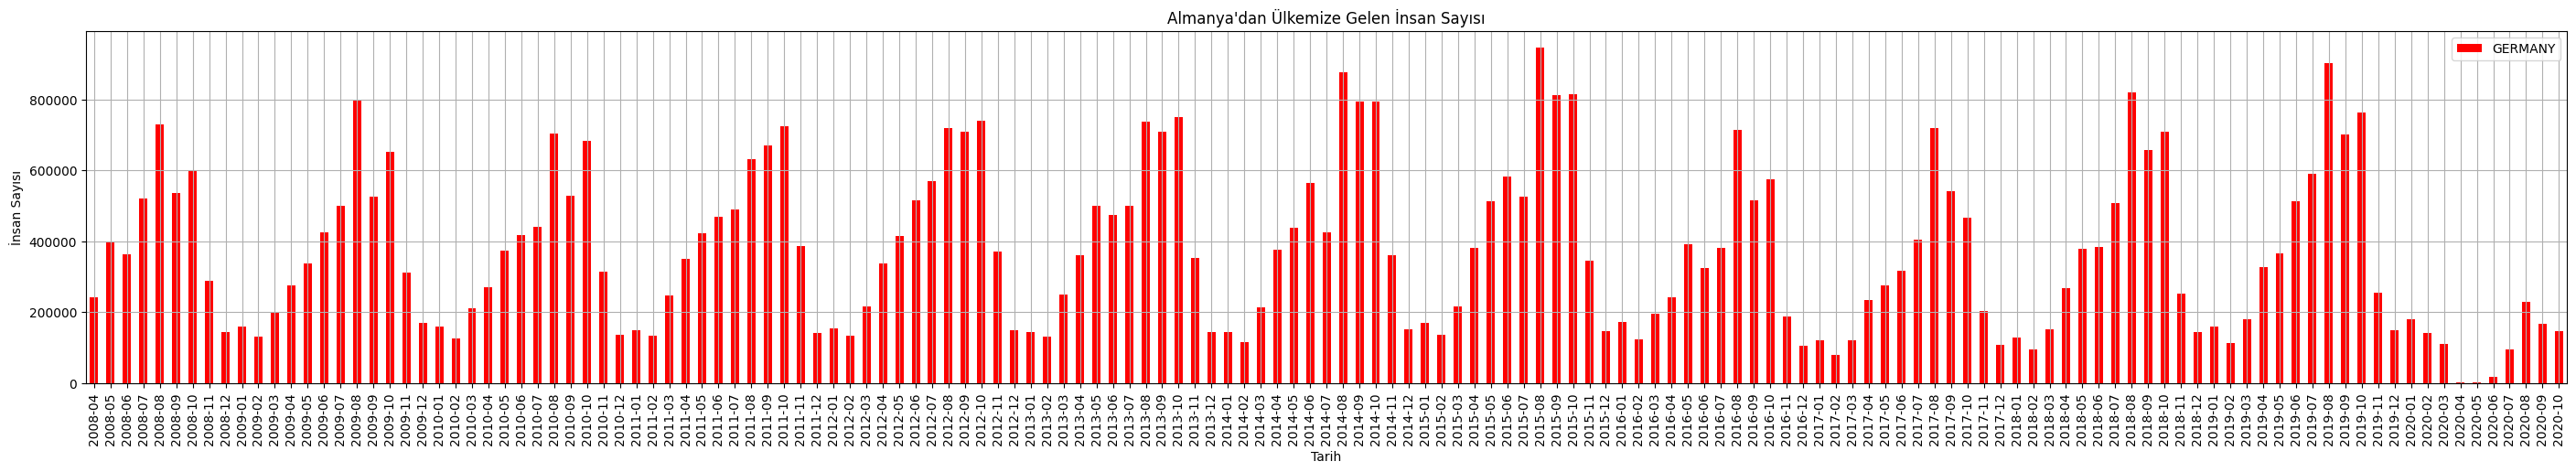

In [5]:
df.plot('DATE','GERMANY',figsize=(35, 5),kind='bar',title="Almanya'dan Ülkemize Gelen İnsan Sayısı",xlabel='Tarih',ylabel='İnsan Sayısı',color='red',grid=True)

#### Almanya'dan Ülkemize Gelen İnsan Sayısı Grafiğine baktığımızda genellikle yaz aylarında yoğunluğun arttığını görüyoruz. En fazla insan nüfusunun olduğu dönemin 2015 in Ağustos ayı olduğunu, En az insan nüfusunun ise 2020 yılının Nisan ve Mart ayları olduğunu grafik üzerinden okuyabiliyoruz.

<Axes: title={'center': "Haymatlos'tan Ülkemize Gelen İnsan Sayısı"}, xlabel='Tarih', ylabel='İnsan Sayısı'>

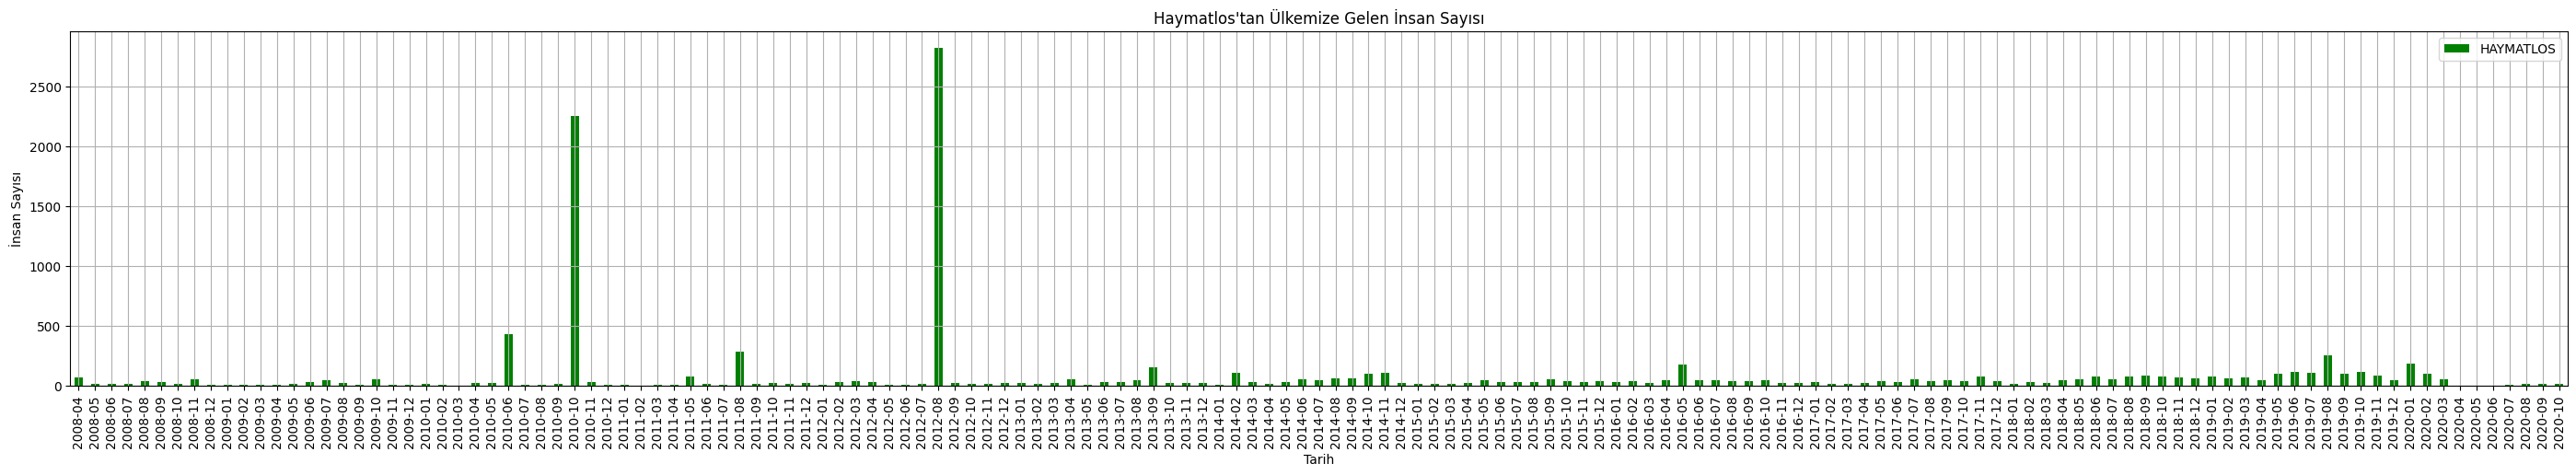

In [6]:
df.plot('DATE','HAYMATLOS',figsize=(35, 5),kind='bar',title="Haymatlos'tan Ülkemize Gelen İnsan Sayısı",xlabel='Tarih',ylabel='İnsan Sayısı',color='green',grid=True)

#### Haymatlos'tan Ülkemize Gelen İnsan Sayısı Grafiğine baktığımızda 2008-2020 yılları arasında çok seyrek bir turist trafiği olduğunu sadece 2 ayda çok fazla ziyaret olduğunu görmekteyiz. 2010'un Ekim ayı ve 2012'nin Ağustos aylarında yoğunluk yaşandığını görmekteyiz. Fakat bu grafikteki insan sayısı ile Almanya'dan gelen insan sayısı grafiğini karşılaştırdığımızda Haymatlos'dan gelen insan sayısının en yüksek olduğu dönemde bile Almanya'dan gelen insan sayısının en az olduğu döneme göre karşılaştırılma yapılamayacağını sayısal olarak görüyoruz.

## Almanya'dan sonra ortalaması en yüksek ve Haymatlos'tan önce ortalaması en düşük olan ülkeleri görebilmek için yukarıda ortalamalarını aldığımız ülkelerin ortalama verilerini küçükten büyüğe sıraladık. 

In [7]:
sirali_mean_values= column_means.sort_values(ascending=False) # Ortalama verilerini büyükten küçüğe doğru sıraladık.
print(sirali_mean_values)

GERMANY                   374472.947020
RUSSIA                    319723.549669
UNITED KINGDOM            191461.112583
BULGARIA                  145514.026490
IRAN                      133439.178808
                              ...      
VENEZUELA                    676.708609
MALTA                        508.622517
ICELAND                      484.854305
OTHER EUROPE COUNTRIES       211.503311
HAYMATLOS                     75.437086
Length: 92, dtype: float64


#### Sıralanmış ortalama verilerine baktığımızda Almanya'dan sonra ülkemize en çok ziyaretçinin Rusyadan ondan sonra da Birleşik Krallıktan turistlerin geldiğini görmekteyiz. Buna göre Rusya ve Birleşik Krallığın grafiklerini çizelim.

<Axes: title={'center': "Rusya'dan Ülkemize Gelen İnsan Sayısı"}, xlabel='Tarih', ylabel='İnsan Sayısı'>

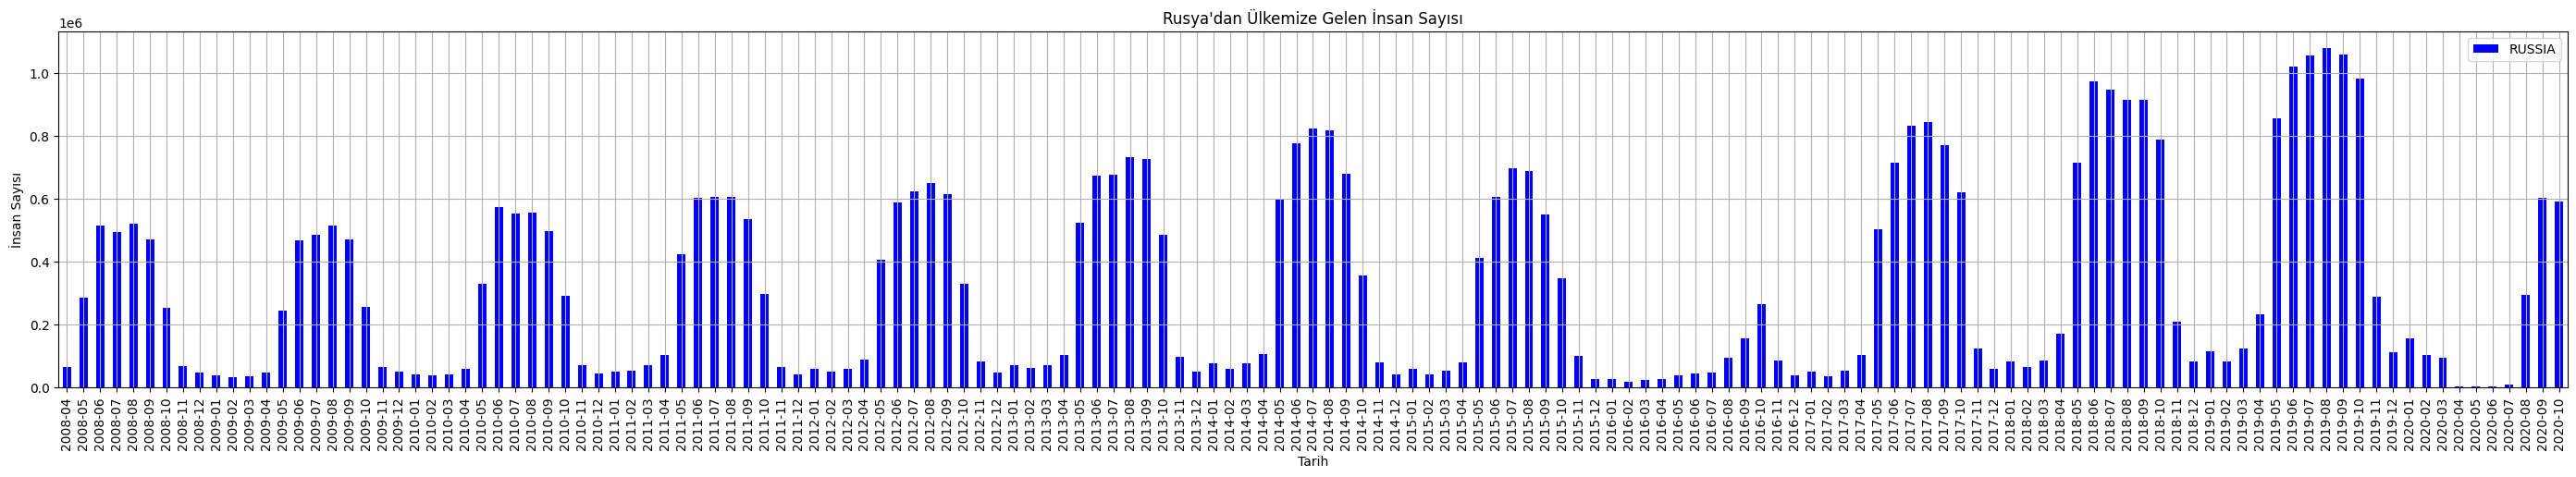

In [8]:
df.plot('DATE','RUSSIA',figsize=(35, 5),kind='bar',title="Rusya'dan Ülkemize Gelen İnsan Sayısı",xlabel='Tarih',ylabel='İnsan Sayısı',color='blue',grid=True)

#### Rusya'dan Ülkemize Gelen İnsan Sayısının grafiğine baktığımızda Almanya ve Haymatlos grafiklerindeki benzerlik olan yaz aylarında Turist yoğunluğunun daha fazla olduğunu görmekteyiz. Bu grafikten dikkatimizi çeken şey 2019 Yaz aylarında en fazla yoğunluğun olduğu görülmekte.

### Rusya ile Almanya Turist grafiklerine baktığımızda Almanya'nın ortalama Turist sayısının fazla olduğunu görsek bile Rusyanın belli dönemlerde Almanya'dan gelen insan sayısından daha fazla insana ulaştığını görüyoruz. Bunu grafik ile de gösterelim:

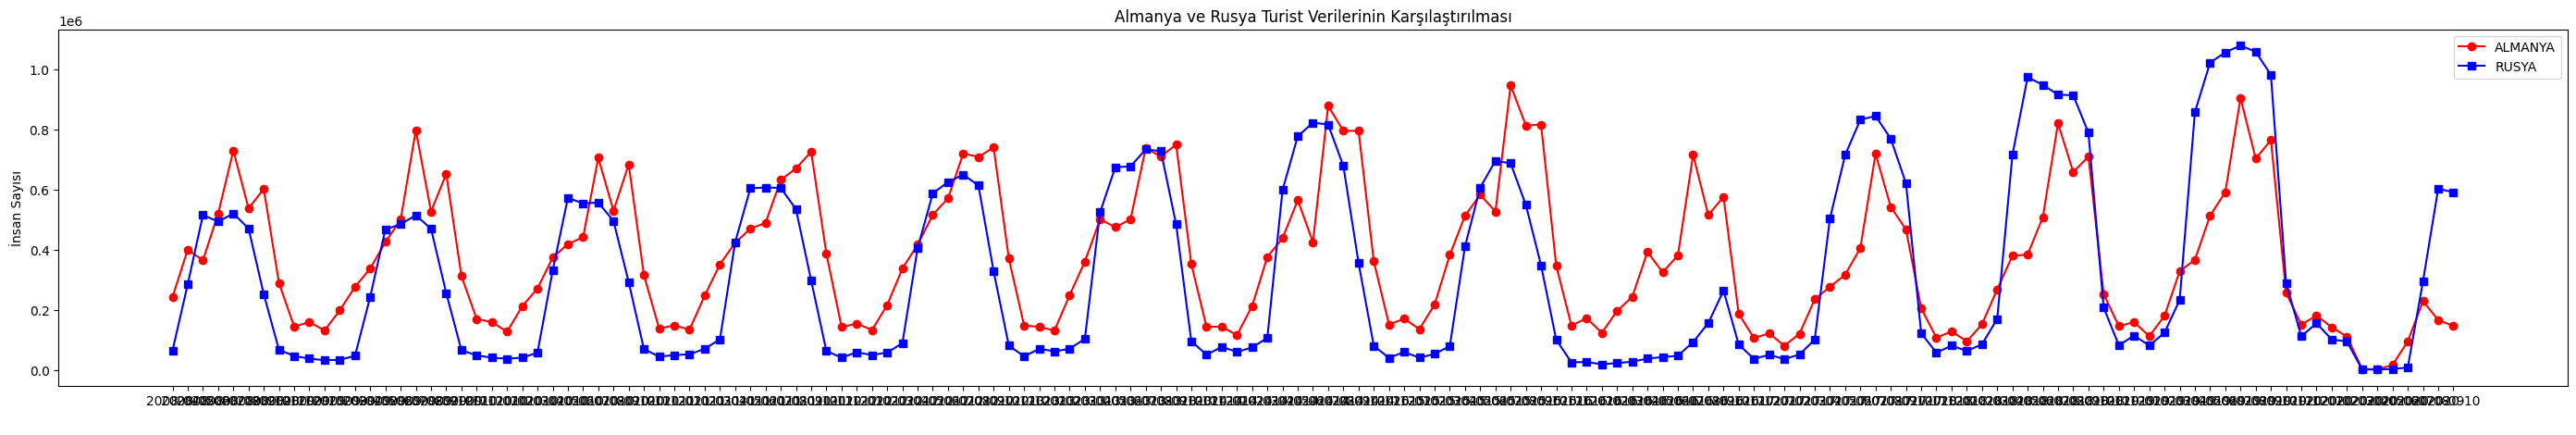

In [9]:
plt.figure(figsize=(35, 5))
plt.plot(df['DATE'], df['GERMANY'], marker='o', color='red', label='ALMANYA')
plt.plot(df['DATE'], df['RUSSIA'], marker='s', color='blue', label='RUSYA')
plt.xlabel(' ')
plt.ylabel('İnsan Sayısı')
plt.title('Almanya ve Rusya Turist Verilerinin Karşılaştırılması')
plt.legend()
plt.show()
#df[['GERMANY','RUSSIA']].plot.hist(stacked=True, bins=20, fontsize=12, figsize=(10, 8))

#### Grafikte de görüldüğü gibi son dönemde Rusya'nın Almanya'ya göre daha fazla turist yoğunluğu olduğu görülmekte. Fakat 2008 yılından 2020 yılına kadar olan süreye bakıldığında Rusya'nın sadece son dönemde turist sayısının Almanya'yı geçtiğini görüyoruz. Yukarıda hesapladığımız genel ortalamaya baktığımızda yine de Almanya'nın Turist konusunda hala birinci sırada olduğu gerçeğini değiştirmiyor. 

## Veri setimizin en büyük ortalamalı ilk 5 ülkesinin grafiğini çizdirelim sonrasında yıllara göre kesitler alarak veriyi inceleyelim.
#### Almanya ve Rusya olmak üzere ilk iki en büyük ortalamalı ülkeyi yukarıda yaptığımızdan dolayı sırasıyla Birleşik Krallık, Bulgaristan ve İran'ın grafiklerini inceleyelim.

## Birleşik Krallık:

<Axes: title={'center': "Birleşik Krallık'tan Ülkemize Gelen İnsan Sayısı"}, xlabel='Tarih', ylabel='İnsan Sayısı'>

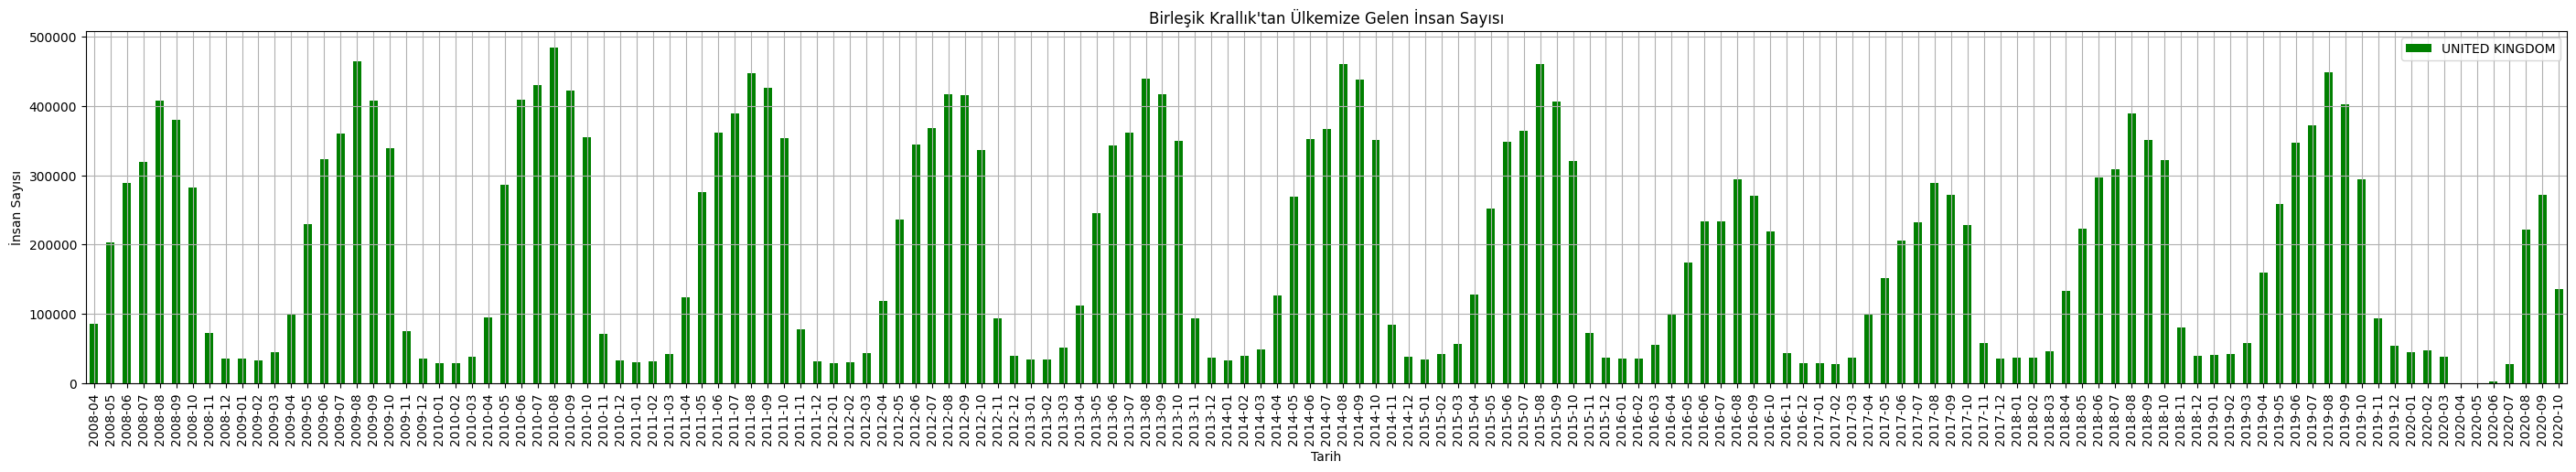

In [10]:
df.plot('DATE','UNITED KINGDOM',figsize=(35, 5),kind='bar',title="Birleşik Krallık'tan Ülkemize Gelen İnsan Sayısı",xlabel='Tarih',ylabel='İnsan Sayısı',color='green',grid=True)

#### Birleşik krallıkta da Almanya ve Rusyada olduğu gibi yaz aylarında ülkemize gelen Turist sayısı diğer aylara göre daha yoğunluktadır.  2020 Nisan,Mayıs ve Haziran aylarına bakıcak olursak Dünyada COVID-19 Pandemisi çıktığından dolayı bu Turizmi etkilediğinden hemen hemen her ülkenin bu aralıkta İnsan yoğunluğu 0'a yakın olduğunu görmekteyiz.

# Bulgaristan:

<Axes: title={'center': "Bulgaristan'dan Ülkemize Gelen İnsan Sayısı"}, xlabel='Tarih', ylabel='İnsan Sayısı'>

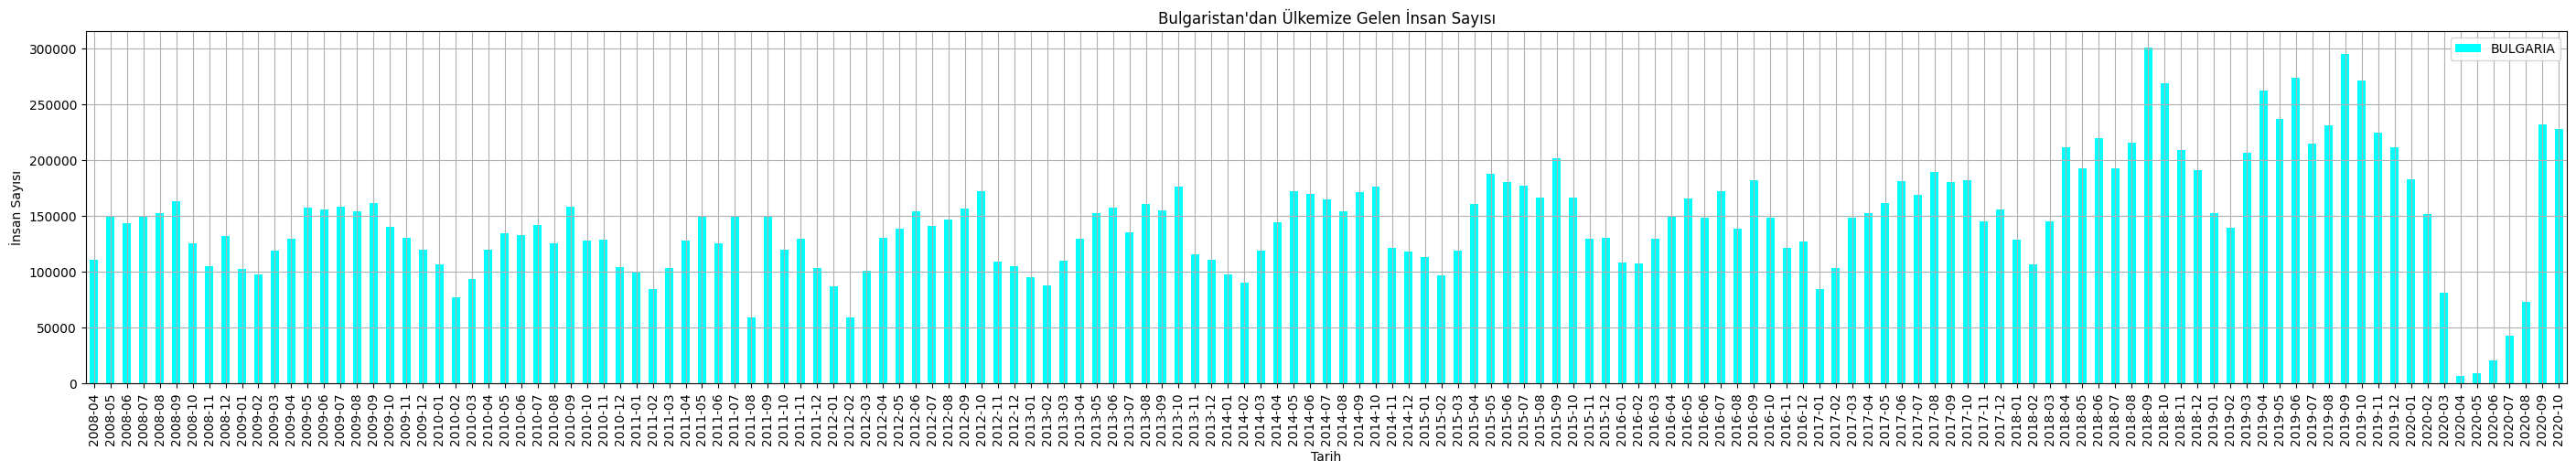

In [11]:
df.plot('DATE','BULGARIA',figsize=(35, 5),kind='bar',title="Bulgaristan'dan Ülkemize Gelen İnsan Sayısı",xlabel='Tarih',ylabel='İnsan Sayısı',color='cyan',grid=True)

#### Bulgaristan'ın grafiğine baktığımızda diğer ülkelerin grafiklerine göre yoğunluğun yaz aylarından ziyade daha çok bütün aylara homojen şekilde yayıldığını son yıllarda 2018 yaz ayları ve 2019 yaz aylarında artış görüyoruz. COVID-19 nedeniyle yine 2020 Nisan,Mayıs ve Haziran aylarında İnsan yoğunluğunun azaldığını bu ülke için de söyleyebiliriz.

# İRAN: 

<Axes: title={'center': "İran'dan Ülkemize Gelen İnsan Sayısı"}, xlabel='Tarih', ylabel='İnsan Sayısı'>

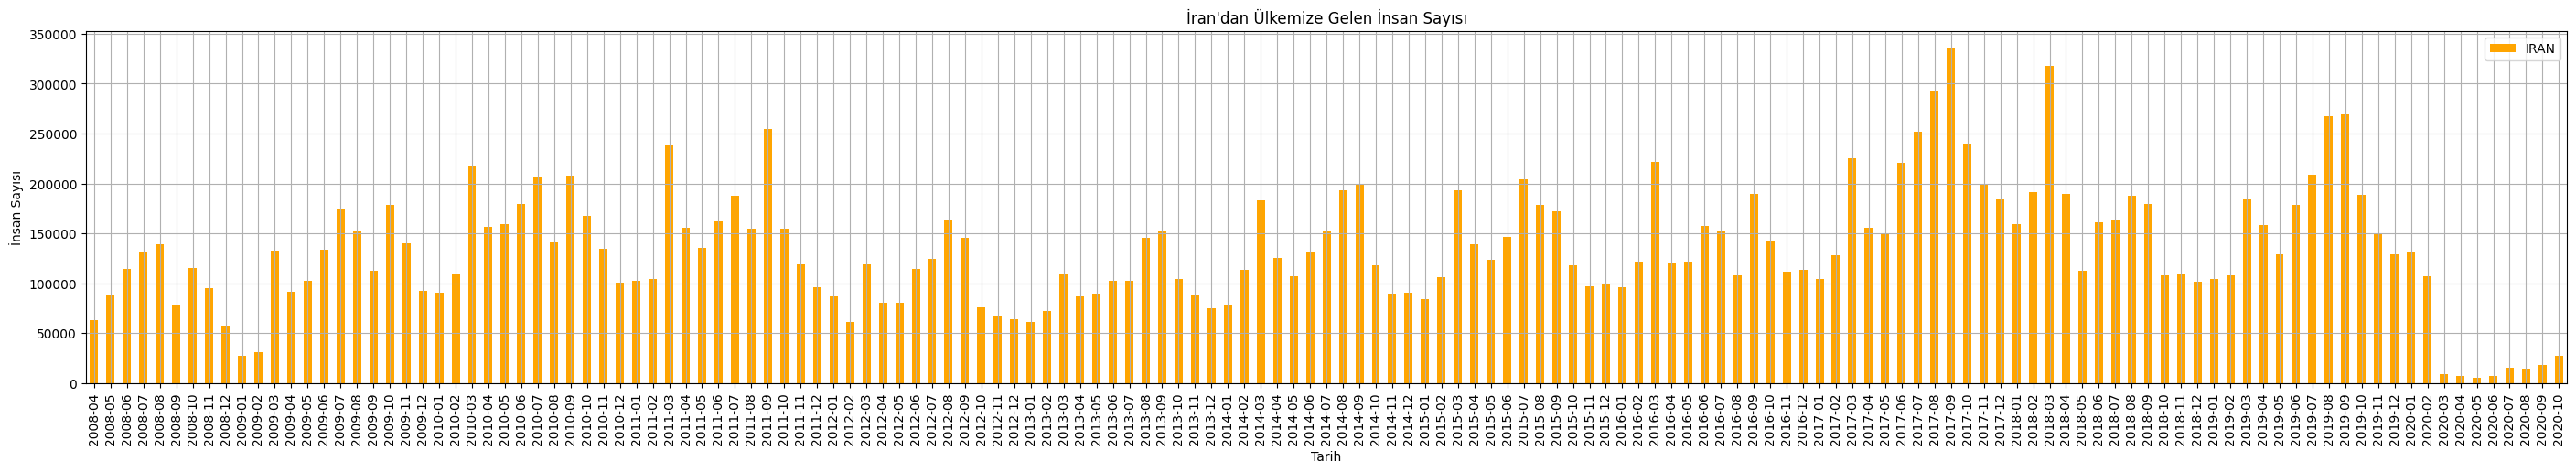

In [12]:
df.plot('DATE','IRAN',figsize=(35, 5),kind='bar',title="İran'dan Ülkemize Gelen İnsan Sayısı",xlabel='Tarih',ylabel='İnsan Sayısı',color='orange',grid=True)

#### İran'dan Ülkemize Gelen İnsan Sayısının grafiğine baktığımızda yine Bulgaristan'a benzer bir grafik ile karşılaşmış bulunmaktayız. İran'dan gelen İnsan sayısının Yıllara göre homojen dağıldığını görüyoruz. COVID-19 nedeniyle son yıllardaki insan yoğunluğunun azaldığını bu ülkede de görüyoruz.

# ADIM 3: VERİYİ PARÇALAYARAK VERİ GÖRSELLEŞTİRMESİ YAPMA

#### Veriyi veri setinden istediğimiz satır ve sütunu çekebilmek için öncelikle bir python fonksiyonu yazmalıyız. Bu bize DataFrame üzerinden istediğimiz satır ve sütun aralığında işlem yapma olanağı sağlayacak.

In [13]:
def data_pull(df,rows,columns):
    
    return df.iloc[:rows, :columns]  #artık veriyi istediğimiz satır ve sütun aralığını yazarak çekip görselleştirebileceğimiz bir fonksiyon yazdık.

#### Kış aylarında ülkeye giren turist sayısında maksimum olan ülke hangisidir ?

#### Yaz aylarında ülkeye giren turist sayısında maksimum olan ülke hangisidir?

#### Avrupadan gelen turist sayısı ile Dünyanın geri kalanından gelen turist sayısı karşılaştırması.

## Verilen 'DATE' Sütunu içerisinden yıl ve ay verisini ayırmak için :

In [14]:
def read_selected_months(file_path, start_year=2008, end_year=2020, selected_months=[1, 2, 12]):
    
    

    # DATE sütununu ayırarak yıl ve ay sütunları oluştur
    df['Year'] = pd.to_datetime(df['DATE']).dt.year
    df['Month'] = pd.to_datetime(df['DATE']).dt.month
     # DATE sütunu hariç tüm sütunlardaki turist sayılarını topla
    df['Total_Tourists'] = df.iloc[:, 1:].sum(axis=1)

    # İlgili ayları ve yılları filtrele
    filtered_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year) & (df['Month'].isin(selected_months))]

    # Veriyi yıllar ve aylar bazında sıralama
    filtered_df = filtered_df.sort_values(by=['Year', 'Month'])

   # Ayları ayrı DataFrame'lere ayırma
    month_data = {month: filtered_df[filtered_df['Month'] == month] for month in selected_months}

    return month_data


# Fonksiyonu kullanma

start_year = 2008
end_year = 2020
selected_months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # İstediğiniz ayları burada belirleyin
data = read_selected_months(file_path, start_year, end_year, selected_months)
#print(data)

winter_month_data = pd.concat([data[month] for month in [12,1,2]])
spring_month_data = pd.concat([data[month] for month in [3,4,5]])
summer_month_data = pd.concat([data[month] for month in [6,7,8]])
fall_month_data = pd.concat([data[month] for month in [9,10,11]])

print(spring_month_data)

        DATE  GERMANY  ALBANIA  AUSTRIA  BELGIUM  BOSNIA AND HERZEGOVINA  \
11   2009-03   198101     3520    21815    15055                    3202   
23   2010-03   211778     2333    23030    14031                    2829   
35   2011-03   246817     2836    28418    18200                    3459   
47   2012-03   215385     3615    19820    14624                    3325   
59   2013-03   248775     4554    25743    19291                    4727   
71   2014-03   212463     5311    17555    20380                    5520   
83   2015-03   217235     5203    16808    17270                    5466   
95   2016-03   196184     5117    15719    13532                    4922   
107  2017-03   120348     5752    10330    13565                    4885   
119  2018-03   151823     8203    13807    13305                    6790   
131  2019-03   179370    10607    15045    19503                    9377   
143  2020-03   110649     3878     7988    11743                    5249   
0    2008-04

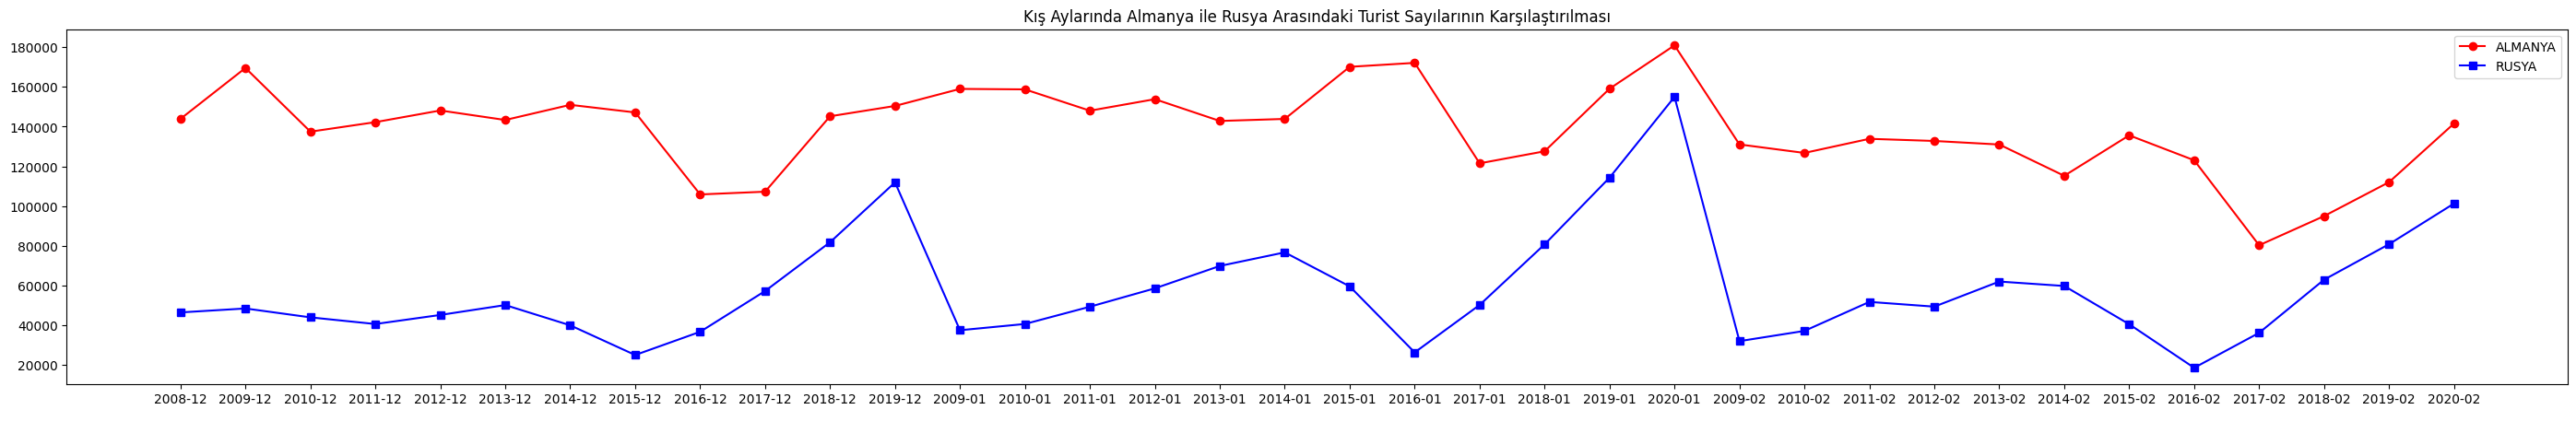

In [15]:
plt.figure(figsize=(35, 5))
plt.plot(winter_month_data['DATE'], winter_month_data['GERMANY'], marker='o', color='red', label='ALMANYA')
plt.plot(winter_month_data['DATE'], winter_month_data['RUSSIA'], marker='s', color='blue', label='RUSYA')
plt.xlabel(' ')
plt.ylabel('')
plt.title('Kış Aylarında Almanya ile Rusya Arasındaki Turist Sayılarının Karşılaştırılması')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


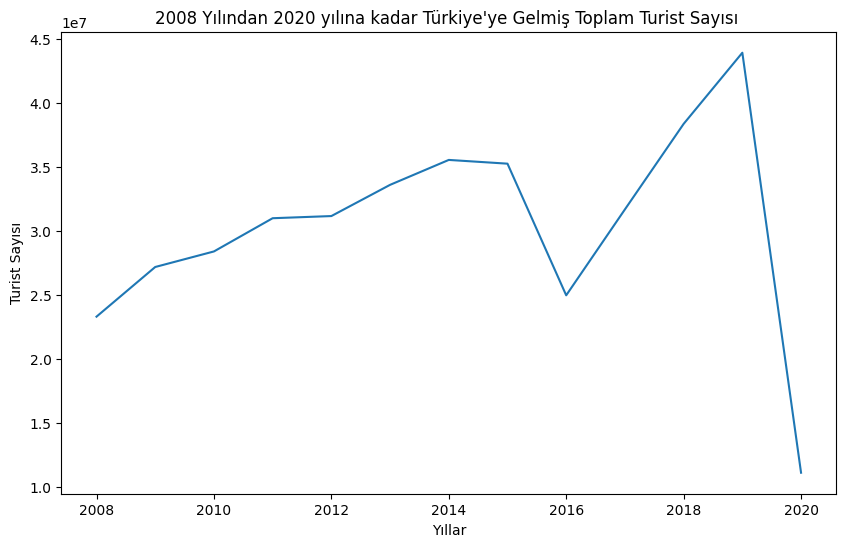

In [16]:
# Yıllık toplam turist sayısı
yearly_data = df.groupby('Year')['Total_Tourists'].sum().reset_index()

# Çizgi grafiği
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total_Tourists', data=yearly_data)
plt.title("2008 Yılından 2020 yılına kadar Türkiye'ye Gelmiş Toplam Turist Sayısı ")
plt.xlabel('Yıllar')
plt.ylabel('Turist Sayısı')
plt.show()

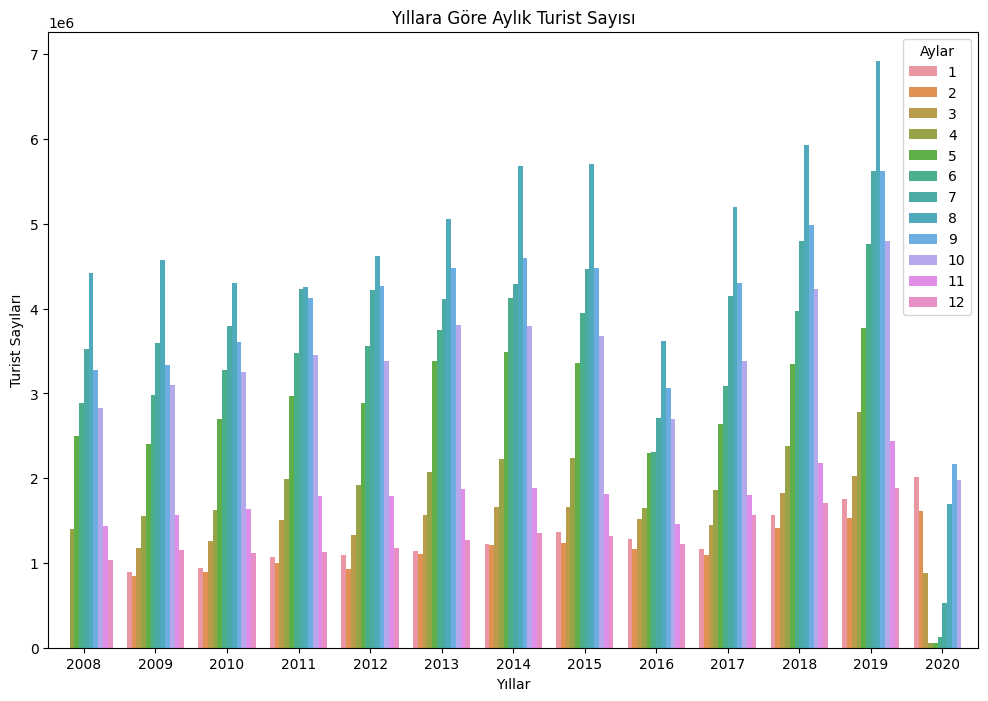

In [17]:
# Aylık toplam turist sayısı
monthly_data = df.groupby(['Year', 'Month'])['Total_Tourists'].sum().reset_index()

# Çubuk grafiği
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Total_Tourists', hue='Month', data=monthly_data)
plt.title('Yıllara Göre Aylık Turist Sayısı')
plt.xlabel('Yıllar')
plt.ylabel('Turist Sayıları')
plt.legend(title='Aylar')
plt.show()

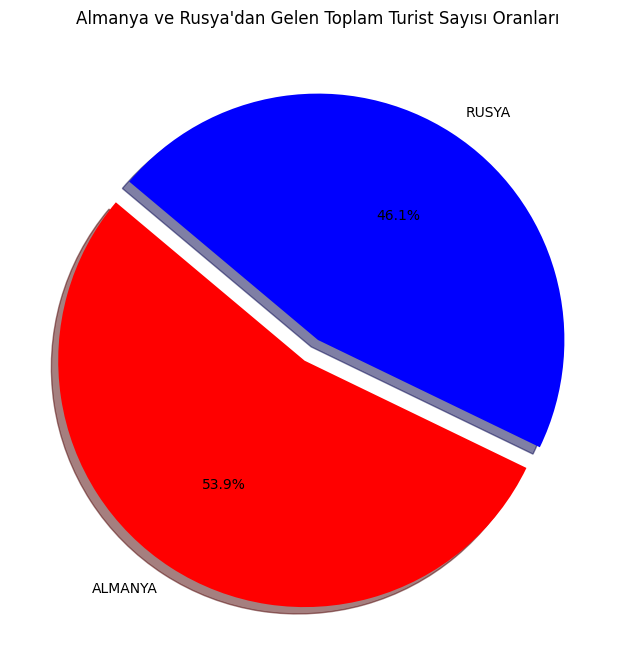

In [18]:
# Almanya ve Rusya'dan gelen toplam turist sayısını hesaplama
total_germany = df['GERMANY'].sum()
total_russia = df['RUSSIA'].sum()

# Pasta grafiği verileri
labels = ['ALMANYA', 'RUSYA']
sizes = [total_germany, total_russia]
colors = ['red', 'blue']
explode = (0.1, 0)  # Almanya dilimini biraz ayırmak için

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Almanya ve Rusya\'dan Gelen Toplam Turist Sayısı Oranları')
plt.show()

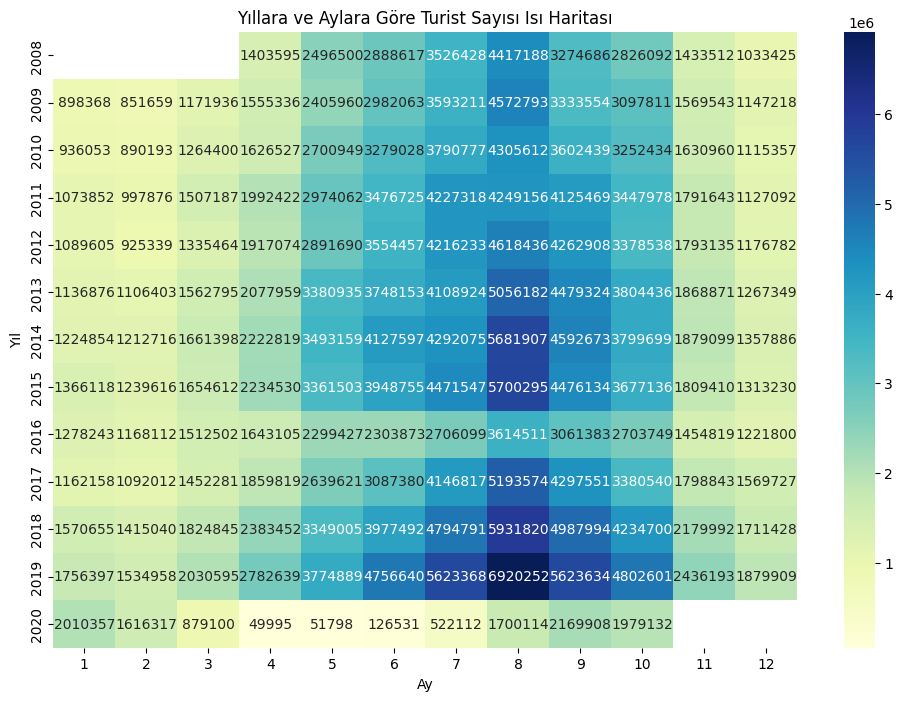

In [19]:
# Pivot tablosu oluşturma
heatmap_data = df.pivot_table(values='Total_Tourists', index='Year', columns='Month', aggfunc='sum')

# Isı haritası
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Yıllara ve Aylara Göre Turist Sayısı Isı Haritası')
plt.xlabel('Ay')
plt.ylabel('Yıl')
plt.show()